In [1]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn2

In [5]:
DataV1 = pd.read_csv("survey lung cancer (2).csv")
DataV1['GENDER'] = DataV1.index
DataV1.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [35]:
DataV1['LUNG_CANCER'] = DataV1['LUNG_CANCER'].astype(str)
sum(DataV1['LUNG_CANCER'] == "1")

270

In [33]:
DataV1['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

In [6]:
DataV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    int64 
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
def percent_value_counts(data, attr):
    percent_df = pd.DataFrame(round(data.loc[:,attr].value_counts(dropna=False, normalize=True)*100,2))
    total_df = pd.DataFrame(data.loc[:,attr].value_counts(dropna=False))
    total_df.columns = ["Total"]
    percent_df.columns = ['Percent']
    print("participation analysis for %s" % attr , " attribute")
    return pd.concat([total_df, percent_df], axis = 1)

In [8]:
for attr in DataV1.columns :
    print(percent_value_counts(DataV1,attr),"\n")

participation analysis for GENDER  attribute
     Total  Percent
308      1     0.32
104      1     0.32
97       1     0.32
98       1     0.32
99       1     0.32
..     ...      ...
206      1     0.32
207      1     0.32
208      1     0.32
209      1     0.32
0        1     0.32

[309 rows x 2 columns] 

participation analysis for AGE  attribute
    Total  Percent
64     20     6.47
63     19     6.15
56     19     6.15
62     18     5.83
60     17     5.50
61     16     5.18
59     15     4.85
70     15     4.85
58     13     4.21
67     13     4.21
55     11     3.56
69     11     3.56
72     10     3.24
71     10     3.24
57      9     2.91
77      9     2.91
68      9     2.91
51      8     2.59
54      8     2.59
65      7     2.27
74      6     1.94
75      5     1.62
53      4     1.29
47      4     1.29
76      4     1.29
66      4     1.29
73      4     1.29
52      4     1.29
49      3     0.97
48      2     0.65
81      2     0.65
78      2     0.65
44      2     0.65
3

In [9]:
columns = DataV1.columns
columns = columns.drop("GENDER")
columns = columns.drop("AGE")
from collections import namedtuple 
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
def cat_graph(data_,attr,out):
    sns.catplot(x=attr, hue=out, kind="count",palette="Accent", edgecolor=".6",data= data_)
    plt.title( 'LUNG_CANCER occurrence in %s  attribute' %attr)
    plt.show()
    
    return DataV1[[out,attr]].groupby([attr,out], as_index=False).size().sort_values(ascending=False)

In [10]:
columns

Index(['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

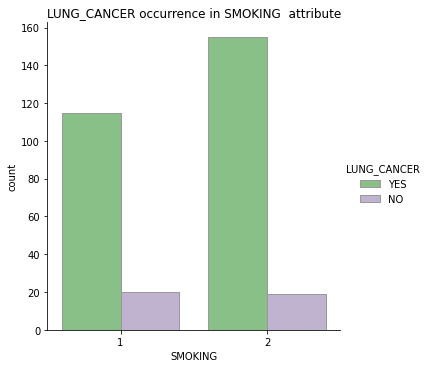

SMOKING  LUNG_CANCER
2        YES            155
1        YES            115
         NO              20
2        NO              19
dtype: int64 



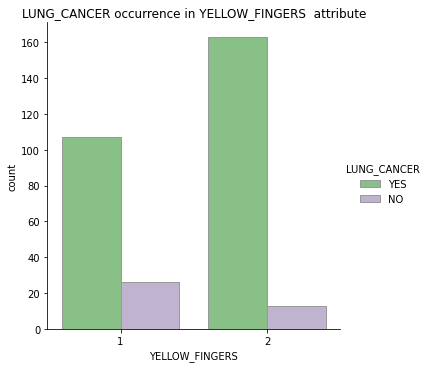

YELLOW_FINGERS  LUNG_CANCER
2               YES            163
1               YES            107
                NO              26
2               NO              13
dtype: int64 



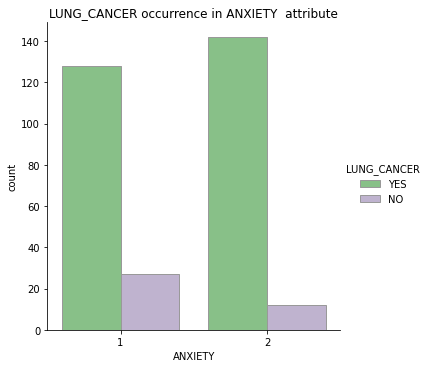

ANXIETY  LUNG_CANCER
2        YES            142
1        YES            128
         NO              27
2        NO              12
dtype: int64 



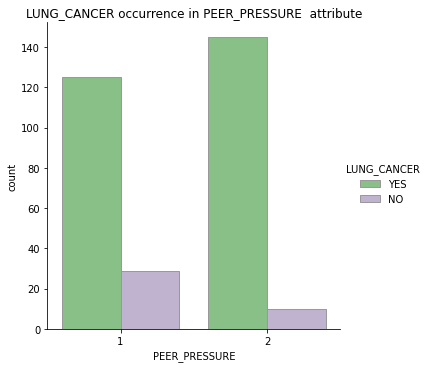

PEER_PRESSURE  LUNG_CANCER
2              YES            145
1              YES            125
               NO              29
2              NO              10
dtype: int64 



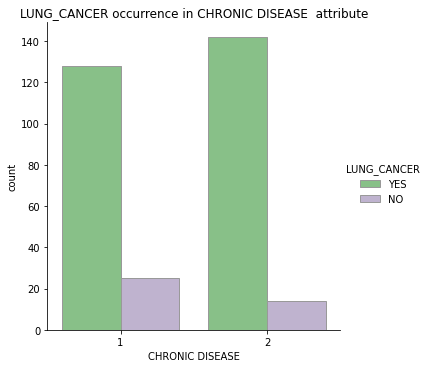

CHRONIC DISEASE  LUNG_CANCER
2                YES            142
1                YES            128
                 NO              25
2                NO              14
dtype: int64 



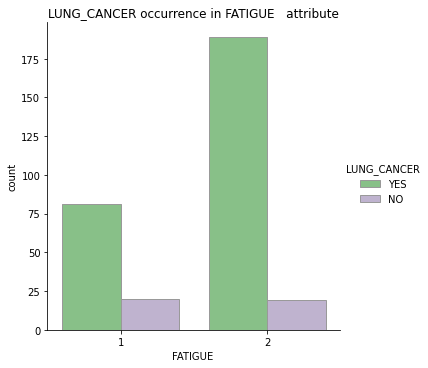

FATIGUE   LUNG_CANCER
2         YES            189
1         YES             81
          NO              20
2         NO              19
dtype: int64 



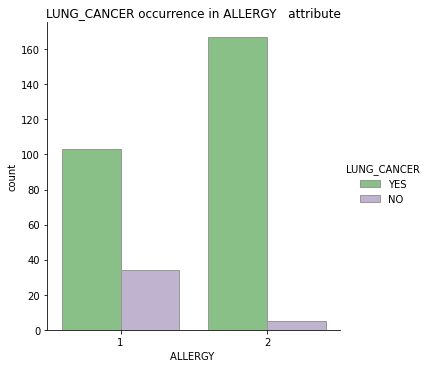

ALLERGY   LUNG_CANCER
2         YES            167
1         YES            103
          NO              34
2         NO               5
dtype: int64 



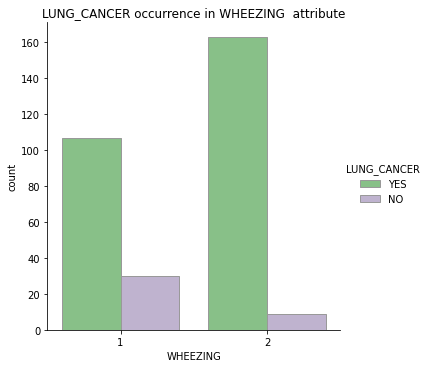

WHEEZING  LUNG_CANCER
2         YES            163
1         YES            107
          NO              30
2         NO               9
dtype: int64 



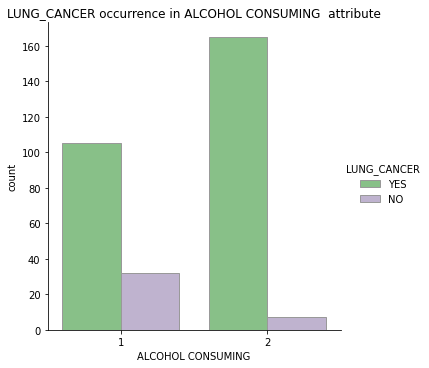

ALCOHOL CONSUMING  LUNG_CANCER
2                  YES            165
1                  YES            105
                   NO              32
2                  NO               7
dtype: int64 



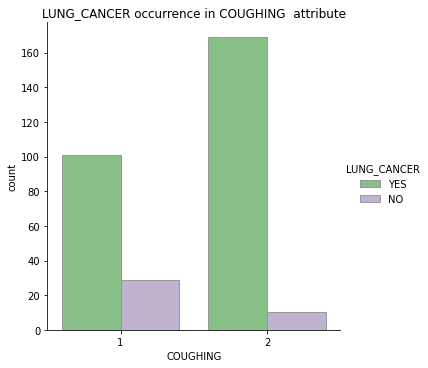

COUGHING  LUNG_CANCER
2         YES            169
1         YES            101
          NO              29
2         NO              10
dtype: int64 



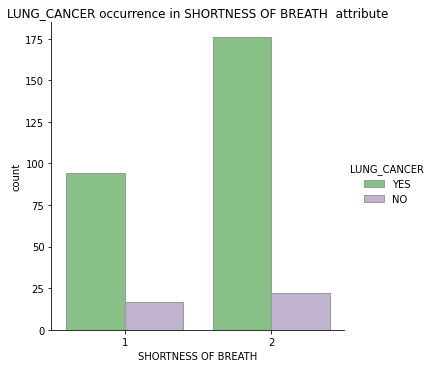

SHORTNESS OF BREATH  LUNG_CANCER
2                    YES            176
1                    YES             94
2                    NO              22
1                    NO              17
dtype: int64 



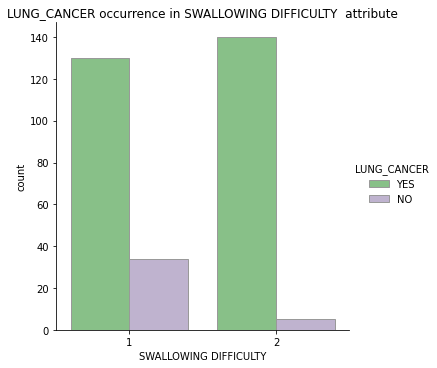

SWALLOWING DIFFICULTY  LUNG_CANCER
2                      YES            140
1                      YES            130
                       NO              34
2                      NO               5
dtype: int64 



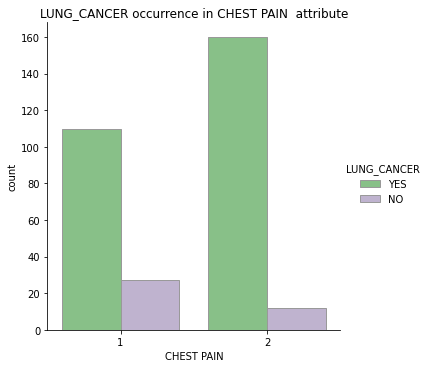

CHEST PAIN  LUNG_CANCER
2           YES            160
1           YES            110
            NO              27
2           NO              12
dtype: int64 



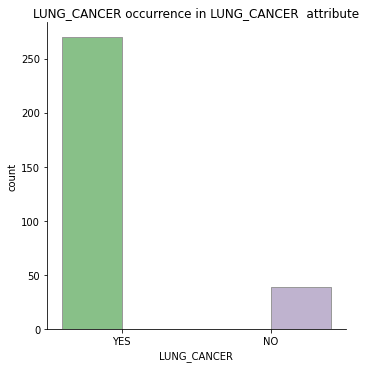

ValueError: Grouper for 'LUNG_CANCER' not 1-dimensional

In [11]:
Cat_columns = columns
for attr in Cat_columns :
    print(cat_graph(DataV1,attr,"LUNG_CANCER"),'\n')

In [12]:
DataV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    int64 
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [13]:
columns

Index(['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [14]:
DataV1[columns]=DataV1[columns].astype("category")
DataV1["LUNG_CANCER"] = DataV1["LUNG_CANCER"].replace({'YES': 1, 'NO': 0})
DataV1["LUNG_CANCER"]=DataV1["LUNG_CANCER"].astype("category")
DataV1 = DataV1.drop("GENDER",axis=1)

In [15]:
X = DataV1.drop("LUNG_CANCER",axis=1)
y = DataV1["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
DataV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   AGE                    309 non-null    int64   
 1   SMOKING                309 non-null    category
 2   YELLOW_FINGERS         309 non-null    category
 3   ANXIETY                309 non-null    category
 4   PEER_PRESSURE          309 non-null    category
 5   CHRONIC DISEASE        309 non-null    category
 6   FATIGUE                309 non-null    category
 7   ALLERGY                309 non-null    category
 8   WHEEZING               309 non-null    category
 9   ALCOHOL CONSUMING      309 non-null    category
 10  COUGHING               309 non-null    category
 11  SHORTNESS OF BREATH    309 non-null    category
 12  SWALLOWING DIFFICULTY  309 non-null    category
 13  CHEST PAIN             309 non-null    category
 14  LUNG_CANCER            309 non-null    cat

In [17]:
treemodel = DecisionTreeClassifier()
treemodel = treemodel.fit(X_train,y_train)
y_pred = treemodel.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))
# calculate the FPR and TPR for all thresholds of the classification
probs = treemodel.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

Accuracy with Decision Tree: 96.77%


In [18]:
#DECISION TREE + K-FOLD
pred_kfold = cross_val_score(treemodel, X, y, cv=5) 
print("Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: 0.87 (+/- 0.08)


In [19]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(treemodel, out_file=None,filled=True, rounded=True,special_characters=True)  
dot_data 

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>7</SUB> &le; 1.5<br/>gini = 0.255<br/>samples = 247<br/>value = [37, 210]>, fillcolor="#5caeea"] ;\n1 [label=<X<SUB>12</SUB> &le; 1.5<br/>gini = 0.402<br/>samples = 115<br/>value = [32, 83]>, fillcolor="#85c3ef"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>10</SUB> &le; 1.5<br/>gini = 0.495<br/>samples = 62<br/>value = [28, 34]>, fillcolor="#dceefa"] ;\n1 -> 2 ;\n3 [label=<X<SUB>5</SUB> &le; 1.5<br/>gini = 0.478<br/>samples = 33<br/>value = [20, 13]>, fillcolor="#f6d3ba"] ;\n2 -> 3 ;\n4 [label=<X<SUB>0</SUB> &le; 56.0<br/>gini = 0.278<br/>samples = 12<br/>value = [10, 2]>, fillcolor="#ea9a61"] ;\n3 -> 4 ;\n5 [label=<X<SUB>3</SUB> &le; 1.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]>, fillcolor="#ffffff"] ;\n4 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]>, fillcolor="#399de5"] ;\n5 -> 

[Text(251.8299418604651, 206.56799999999998, 'X[7] <= 1.5\ngini = 0.255\nsamples = 247\nvalue = [37, 210]'),
 Text(200.00406976744185, 184.824, 'X[12] <= 1.5\ngini = 0.402\nsamples = 115\nvalue = [32, 83]'),
 Text(127.49651162790698, 163.07999999999998, 'X[10] <= 1.5\ngini = 0.495\nsamples = 62\nvalue = [28, 34]'),
 Text(64.23488372093023, 141.336, 'X[5] <= 1.5\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(31.144186046511628, 119.592, 'X[0] <= 56.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(15.572093023255814, 97.848, 'X[3] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(7.786046511627907, 76.10399999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.35813953488372, 76.10399999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(46.71627906976744, 97.848, 'X[3] <= 1.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(38.93023255813954, 76.10399999999998, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(54.50232558139535, 76.10399999999998,

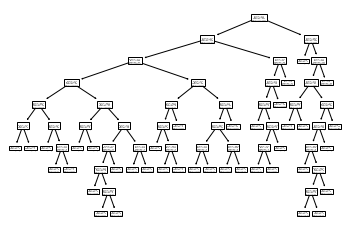

In [20]:
tree.plot_tree(treemodel)

MODEL EVALUATION
In order to find the most suitable algorithm to this dataset, different evaluation methods will be presented: Accuracy, Confusion Matrix, ROC Curve.
Given:

TP = #samples for which the prediction is Fruit1 and the true label is Fruit1
FP = #samples for which the prediction is Fruit2 but the true label is Fruit1
TN = #samples for which the prediction is Fruit2 and the true label is Fruit2
FN = #samples for which the prediction is Fruit1 but the true label is Fruit2
We can define:

ACCURACY:  TP+TNTP+FP+TN+FN  that is the percentage of samples classified correctly.

CONFUSION MATRIX: A simple table with previous values used to show performance of a classifier

ROC CURVE: Area Under the Receiver Operating Characteristic curve (AUC)

To introduce this concept, we define the following two metrics:

True positive rate (TPR): TPR = recall =  TPFN+TP 


False positive rate (FPR): FPR =  FPTN+FP 

In order to plot the Receiver Operating Characteristic (ROC) curve we need to compute TPR and FPR and choose a number of thresholds for the classification (AUG). Area under the ROC curve, performed plotting TPR and FPR is used as evaluation matrics for the different classifiers.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
param_grid={'criterion': ["gini", "entropy", "log_loss"],
            'max_depth':  np.linspace(5,12,8,dtype = int),}

gs=GridSearchCV(treemodel, param_grid, scoring=make_scorer(f1_score), 
                n_jobs=-1, cv=5, verbose=False)

gs.fit(X_train, y_train)
gs_test_score=accuracy_score(y_test, gs.predict(X_test))


print("Best F1-score {:.3f} params {}".format(-gs.best_score_, gs.best_params_))

Best F1-score -0.914 params {'criterion': 'gini', 'max_depth': 5}


In [22]:
def evaluating_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    print(f'Accuracy Score: {round(accuracy_score(y_valid, pred) * 100, 3)}')
    print(f'Precision Score: {round(precision_score(y_valid,pred) * 100, 3)}')
    print(f'Recall Score: {round(recall_score(y_valid,pred) * 100, 3)}')

In [23]:
evaluating_model(treemodel,X_train, y_train, X_test, y_test)

Accuracy Score: 95.161
Precision Score: 98.305
Recall Score: 96.667


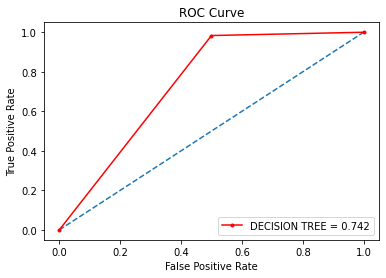

In [24]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Ahmed\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

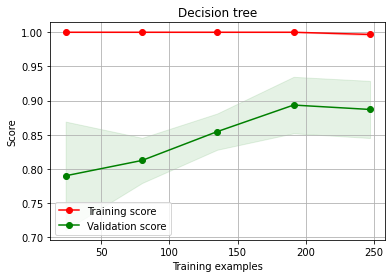

In [26]:
plot_learning_curve(treemodel,"Decision tree",X,y)